In [1]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'std-colors', 'grid'])

plt.rcParams['figure.figsize'] = (3.54, 3.54/1.5)
# plt.rcParams['figure.dpi'] = 600
plt.rcParams["axes.axisbelow"] = True
# plt.rcParams["axes.grid"] = True

In [4]:
# Get the current style
current_style = plt.rcParams['axes.prop_cycle']

# Extract the colors from the style
colors = [color['color'] for color in current_style]

# Print the colors
print(colors)

['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']


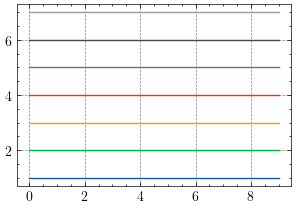

In [5]:
import numpy as np
for i in range(7):
    plt.plot(np.arange(10), np.full(10, i+1))
plt.show()

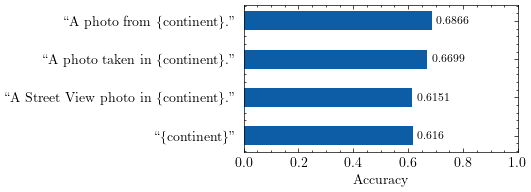

In [6]:
fig = plt.figure(figsize=(3.54, 3.54/1.85))

data = {
    r'``\{continent\}"': 0.6160, 
    r'``A Street View photo in \{continent\}."': 0.6151,
    r'``A photo taken in \{continent\}."': 0.6699,
    r'``A photo from \{continent\}."': 0.6866,
}

bars = plt.barh(data.keys(), data.values(), 0.5)
plt.bar_label(bars, padding=3, fontsize=8)

plt.xlabel('Accuracy')
# plt.title('Validation accuracy with different prompt templates')
plt.xlim(0,1)

plt.grid(False)

plt.savefig("figures/clip-vit-base-16-continent-zeroshot.png",bbox_inches='tight', dpi=600)
plt.savefig("figures/clip-vit-base-16-continent-zeroshot.pdf",bbox_inches='tight', dpi=600)
plt.show()

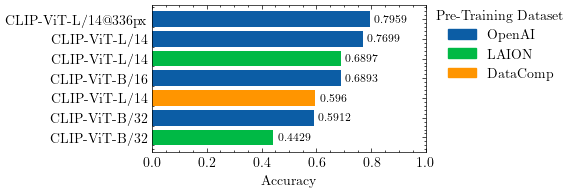

In [10]:
import matplotlib.patches as mpatches


fig = plt.figure(figsize=(3.54, 3.54/1.85))

openai = '#0C5DA5'
laion = '#00B945'
datacomp = '#FF9500'

# Test accuracy
data = [
    ('CLIP-ViT-B/32', 0.5912, openai),  
    ('CLIP-ViT-B/16', 0.6893, openai), 
    ('CLIP-ViT-L/14', 0.7699, openai), 
    ('CLIP-ViT-L/14@336px', 0.7959, openai),
    ('CLIP-ViT-B/32 ', 0.4429,laion), # laion/CLIP-ViT-B-32-laion2B-s34B-b79K
    ('CLIP-ViT-L/14 ', 0.6897, laion), # laion/CLIP-ViT-L-14-laion2B-s32B-b82K
    ('CLIP-ViT-L/14  ', 0.5960, datacomp), # laion/CLIP-ViT-L-14-DataComp.XL-s13B-b90K
]
data.sort(key=lambda tup: tup[1])

bars = plt.barh([model for model,_,_ in data], [score for _,score,_ in data], color=[color for _,_,color in data])
plt.bar_label(bars, padding=3, fontsize=8)

plt.xlabel('Accuracy')
plt.xlim(0,1)

blue = mpatches.Patch(color=openai, label='OpenAI')
green = mpatches.Patch(color=laion, label='LAION')
yellow = mpatches.Patch(color=datacomp, label='DataComp')
plt.legend(title="Pre-Training Dataset", handles=[blue, green, yellow], loc='upper right', bbox_to_anchor=(1.55, 1.05), frameon=False)

plt.grid(False)

plt.savefig("figures/clip-vit-models-continent-zeroshot.png",bbox_inches='tight', dpi=600)
plt.savefig("figures/clip-vit-models-continent-zeroshot.pdf",bbox_inches='tight', dpi=600)
plt.show()